In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import biom
%matplotlib inline

In [2]:
metadata = pd.read_csv('metadata.csv', index_col=0)
metadata.head()

,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,elevation_units,empo_1,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
format_combo,,,,,,,,,,,,,,,,,,,,,
23B_Day7_1,12986.23B.Day7.1,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,78.0,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_10,12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,53.3,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_11,12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,80.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_12,12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,49.1,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_13,12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,48.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN


# AZ20

### Counts

In [3]:
AZ20_plasmid_counts = pd.read_csv('./AZ20_lplasmid_number.txt', sep='\t', header=None)
AZ20_plasmid_counts
#names already fixed

,0
0,23B_Day7_10_S382/large_plasmids.fasta:3
1,23B_Day7_11_S383/large_plasmids.fasta:3
2,23B_Day7_12_S384/large_plasmids.fasta:3
3,23B_Day7_13_S1294/large_plasmids.fasta:2
4,23B_Day7_14_S1295/large_plasmids.fasta:2
...,...
1470,30N_Day7_6_S924/large_plasmids.fasta:2
1471,30N_Day7_7_S925/large_plasmids.fasta:2
1472,30N_Day7_8_S926/large_plasmids.fasta:2
1473,30N_Day7_9_S927/large_plasmids.fasta:2


In [4]:
AZ20_plasmid_counts[['sample', 'other']] = AZ20_plasmid_counts[0].str.split('/', 1, expand=True)

/var/folders/m1/h11rhh850_s7fjxgxw5wzh_r0000gp/T/ipykernel_21655/167871504.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  AZ20_plasmid_counts[['sample', 'other']] = AZ20_plasmid_counts[0].str.split('/', 1, expand=True)


In [5]:
AZ20_plasmid_counts['number_of_plasmids'] = AZ20_plasmid_counts['other'].str.split(':').str[1]

In [6]:
AZ20_plasmid_counts['sample-id'] = AZ20_plasmid_counts['sample'].replace(to_replace='_S[0-9]*', value='', regex=True)

In [7]:
AZ20_plasmid_counts['sample-id'] = AZ20_plasmid_counts['sample-id'].replace(to_replace='_L003', value='', regex=True)

In [8]:
AZ20_plasmid_counts['sample-id'] = AZ20_plasmid_counts['sample-id'].replace(to_replace='_pos', value='p', regex=True)

In [9]:
for x in range(1,13):
    AZ20_plasmid_counts['sample-id'] = AZ20_plasmid_counts['sample-id'].replace(to_replace='_%s_2' % x, value='_%sx' % x, regex=True)

In [10]:
AZ20_plasmid_counts['sample-id'] = AZ20_plasmid_counts['sample-id'].replace(to_replace='_12_A', value='_12', regex=True)
AZ20_plasmid_counts['sample-id'] = AZ20_plasmid_counts['sample-id'].replace(to_replace='_12_B', value='_13', regex=True)

In [11]:
AZ20_plasmid_counts.head()

,0,sample,other,number_of_plasmids,sample-id
0,23B_Day7_10_S382/large_plasmids.fasta:3,23B_Day7_10_S382,large_plasmids.fasta:3,3,23B_Day7_10
1,23B_Day7_11_S383/large_plasmids.fasta:3,23B_Day7_11_S383,large_plasmids.fasta:3,3,23B_Day7_11
2,23B_Day7_12_S384/large_plasmids.fasta:3,23B_Day7_12_S384,large_plasmids.fasta:3,3,23B_Day7_12
3,23B_Day7_13_S1294/large_plasmids.fasta:2,23B_Day7_13_S1294,large_plasmids.fasta:2,2,23B_Day7_13
4,23B_Day7_14_S1295/large_plasmids.fasta:2,23B_Day7_14_S1295,large_plasmids.fasta:2,2,23B_Day7_14


In [14]:
AZ20_plasmid_counts.number_of_plasmids.min()

'1'

In [16]:
AZ20_plasmid_counts2 = AZ20_plasmid_counts[['sample-id', 'number_of_plasmids']].copy()
AZ20_plasmid_counts2.head()

,sample-id,number_of_plasmids
0,23B_Day7_10,3
1,23B_Day7_11,3
2,23B_Day7_12,3
3,23B_Day7_13,2
4,23B_Day7_14,2


In [24]:
AZ20_plasmidcounts = pd.merge(AZ20_plasmid_counts2, metadata[metadata['bacteria_strain']=='AZ20'], 
                              left_on='sample-id', right_on='format_combo', how='outer')
AZ20_plasmidcounts.head()

,sample-id,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
0,23B_Day7_10,3,12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,...,53.3,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
1,23B_Day7_11,3,12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,...,80.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
2,23B_Day7_12,3,12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,...,49.1,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
3,23B_Day7_13,2,12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,...,48.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
4,23B_Day7_14,2,12986.23B.Day7.14,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,...,39.3,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN


In [31]:
AZ20_plasmidcounts['number_of_plasmids'] = AZ20_plasmidcounts['number_of_plasmids'].fillna(0)
#makes sure to account for everything that exists, even when it might not have detected plasmids
AZ20_plasmidcounts['number_of_plasmids'] = AZ20_plasmidcounts['number_of_plasmids'].astype(int)
#values treated as numbers

In [33]:
AZ20_plasmidcounts['number_of_plasmids'].describe()

count    1586.000000
mean        2.497478
std         1.413877
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        17.000000
Name: number_of_plasmids, dtype: float64

In [34]:
AZ20_plasmidcounts['number_of_plasmids'].value_counts()

3     698
2     636
0     108
1      53
4      43
5      26
11      7
6       4
17      2
8       2
12      2
13      2
14      1
15      1
10      1
Name: number_of_plasmids, dtype: int64

In [55]:
AZ20_plasmidcounts.tail()

,sample-id,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
1581,NaN,0,12986.29N.Month6.20,8.0,29.0,Month6,1/16/18 10:00,7/12/17 0:00,RC,193.0,...,32.3,29N,B2,B,1/16/18,AZ20,filter,Qiagen UltraClean,1.0,NaN
1582,NaN,0,12986.29N.Month6.21,8.0,29.0,Month6,1/16/18 10:00,7/12/17 0:00,RC,193.0,...,27.7,29N,B2,B,1/16/18,AZ20,filter,Qiagen UltraClean,1.0,NaN
1583,NaN,0,12986.29N.Month6.22,8.0,29.0,Month6,1/16/18 10:00,7/12/17 0:00,RC,193.0,...,49.6,29N,B2,B,1/16/18,AZ20,filter,Qiagen UltraClean,1.0,NaN
1584,NaN,0,12986.29N.Month6.23,8.0,29.0,Month6,1/16/18 10:00,7/12/17 0:00,RC,193.0,...,50.7,29N,B2,B,1/16/18,AZ20,filter,Qiagen UltraClean,1.0,NaN
1585,NaN,0,12986.29N.Month6.24,8.0,29.0,Month6,1/16/18 10:00,7/12/17 0:00,RC,193.0,...,44.6,29N,B2,B,1/16/18,AZ20,filter,Qiagen UltraClean,1.0,NaN


In [56]:
AZ20_plasmidcounts.collection_timepoint.unique()

array(['Day7', 'Month3', 'Month6', nan, 'Day3', 'Month10', 'Month1',
       'reference'], dtype=object)

In [57]:
AZ20_plasmidcounts['number_of_plasmids'] = AZ20_plasmidcounts['number_of_plasmids'].astype(int)

In [58]:
AZ20_plasmidcounts[AZ20_plasmidcounts['sample-id'] == 'AZ20_ref']

,sample-id,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
1477,AZ20_ref,2,NaN,NaN,NaN,reference,NaN,NaN,NaN,NaN,...,NaN,ref,NaN,NaN,NaN,AZ20,NaN,NaN,NaN,NaN


In [59]:
AZ20_plasmidcounts['number_of_plasmids'].mean()

2.4974779319041613

In [60]:
AZ20_plasmidcounts['number_of_plasmids'].std()

1.413876678823024

In [61]:
np.median(AZ20_plasmidcounts['number_of_plasmids'].values)

2.0

In [62]:
np.std(AZ20_plasmidcounts['number_of_plasmids'].values, ddof=1) / np.mean(AZ20_plasmidcounts['number_of_plasmids'].values)
#variation

0.566121790611795

In [63]:
0.48228854475268357/0.8161293477536328
#AZ20/AZ51 variation

0.5909462097891294

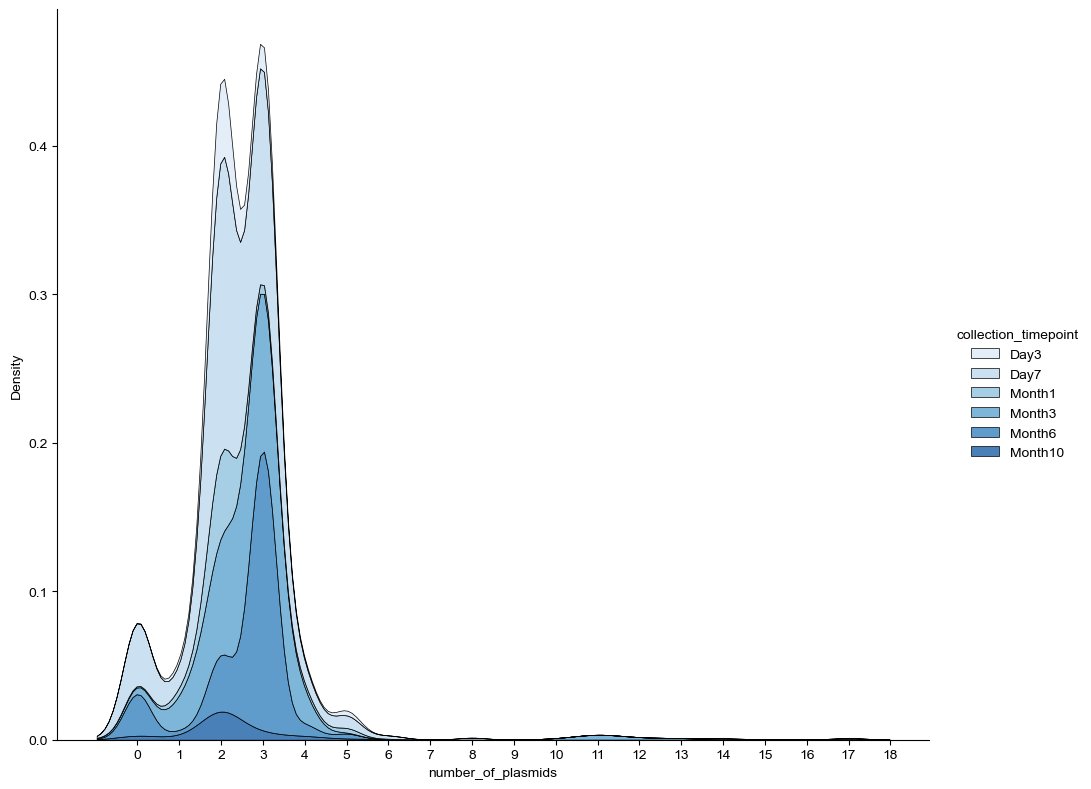

In [64]:
sns.displot(data=AZ20_plasmidcounts, x="number_of_plasmids", hue="collection_timepoint", 
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='Blues',
            multiple="stack", kind='kde', height=8, aspect=1.2, ec='black', lw=0.5)
plt.xticks(range(0, 19))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ20_stack_density_pcounts.svg', dpi=150, bbox_inches='tight')

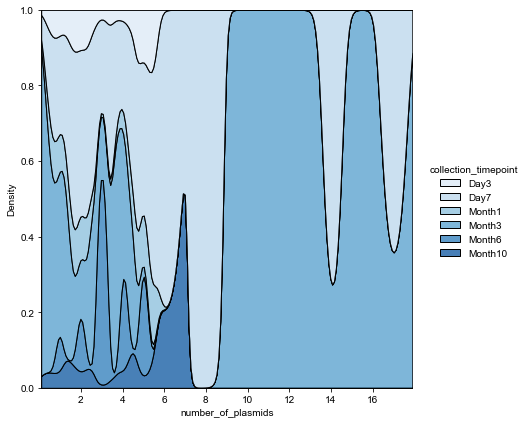

In [20]:
sns.displot(
    data=AZ20_plasmidcounts,
    x="number_of_plasmids", hue="collection_timepoint",
    kind="kde", height=6, warn_singular=False, 
    hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
    multiple="fill", clip=(0, None),
    palette="Blues")

<AxesSubplot:xlabel='number_of_plasmids', ylabel='Count'>

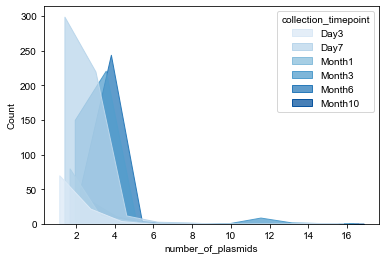

In [21]:
sns.histplot(data=AZ20_plasmidcounts, x="number_of_plasmids", 
             hue="collection_timepoint", bins=10, palette='Blues',
             common_norm=True, element='poly',
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
            multiple="dodge")

<AxesSubplot:xlabel='number_of_plasmids', ylabel='Count'>

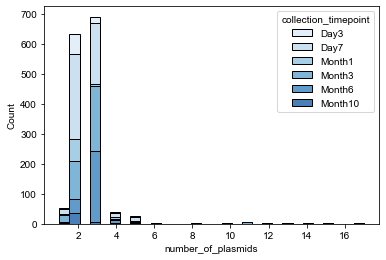

In [22]:
sns.histplot(data=AZ20_plasmidcounts, x="number_of_plasmids", 
             hue="collection_timepoint", bins=30, palette='Blues',
             common_norm=True, 
             #element='poly',
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
            multiple="stack")

<AxesSubplot:xlabel='number_of_plasmids', ylabel='Percent'>

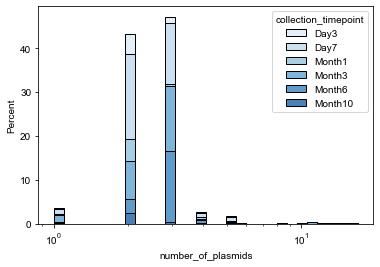

In [23]:
sns.histplot(data=AZ20_plasmidcounts, x="number_of_plasmids", 
             hue="collection_timepoint", bins=30, palette='Blues',
             stat="percent", log_scale=True, multiple="stack",
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [24]:
#Need to plot average number of plasmids per isolate per TP
AZ20_plasmidcounts2 = AZ20_plasmidcounts[["collection_timepoint", "number_of_plasmids"]].copy()
AZ20_group_plasmidcounts = AZ20_plasmidcounts2.groupby(by=["collection_timepoint"]).sum()
AZ20_group_plasmidcounts

,number_of_plasmids
collection_timepoint,
Day3,224
Day7,1384
Month1,211
Month10,122
Month3,1113
Month6,856
reference,2


In [25]:
AZ20_plasmidcounts3 = AZ20_plasmidcounts[["collection_timepoint", 'isolate_number']].copy()
AZ20_isocounts_plasmidcounts = AZ20_plasmidcounts3.groupby(by=["collection_timepoint"]).count()
AZ20_isocounts_plasmidcounts

,isolate_number
collection_timepoint,
Day3,96
Day7,538
Month1,95
Month10,51
Month3,385
Month6,297
reference,1


In [26]:
AZ20_summary = pd.concat([AZ20_group_plasmidcounts, AZ20_isocounts_plasmidcounts], axis=1)
AZ20_summary['average_plasmids_per_isolate'] =AZ20_summary['number_of_plasmids']/AZ20_summary['isolate_number']
AZ20_summary

,number_of_plasmids,isolate_number,average_plasmids_per_isolate
collection_timepoint,,,
Day3,224,96,2.333333
Day7,1384,538,2.572491
Month1,211,95,2.221053
Month10,122,51,2.392157
Month3,1113,385,2.890909
Month6,856,297,2.882155
reference,2,1,2.000000


In [27]:
AZ20_summary2 = AZ20_summary.copy()
AZ20_summary2 = AZ20_summary2.reset_index()
AZ20_summary2 = AZ20_summary2[AZ20_summary2.collection_timepoint.isin(['reference','Day7','Month3', 'Month6'])]
AZ20_summary2.set_index('collection_timepoint', inplace=True)
AZ20_summary2.reindex(['reference','Day7','Month3', 'Month6'])

,number_of_plasmids,isolate_number,average_plasmids_per_isolate
collection_timepoint,,,
reference,2,1,2.000000
Day7,1384,538,2.572491
Month3,1113,385,2.890909
Month6,856,297,2.882155


In [28]:
#are the samples with extra timepoints just outliers from average?
extra_tp_mice = ['23LL', '25N', '28L', '28N']
etp_mice_plasmids = AZ20_plasmidcounts[AZ20_plasmidcounts.mouse.isin(extra_tp_mice)]

etp_mice_plasmidc = etp_mice_plasmids[["collection_timepoint", 'isolate_number']].copy()
etp_mice_plasmid_isocounts = etp_mice_plasmidc.groupby(by=["collection_timepoint"]).count()

etp_mice_plasmidcn = etp_mice_plasmids[["collection_timepoint", 'number_of_plasmids']].copy()
etp_mice_plasmid_pcounts = etp_mice_plasmidcn.groupby(by=["collection_timepoint"]).sum()

AZ20_etp_summary = pd.concat([etp_mice_plasmid_pcounts, etp_mice_plasmid_isocounts], axis=1)
AZ20_etp_summary['average_plasmids_per_isolate'] =AZ20_etp_summary['number_of_plasmids']/AZ20_etp_summary['isolate_number']
AZ20_etp_summary.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

,number_of_plasmids,isolate_number,average_plasmids_per_isolate
collection_timepoint,,,
Day3,224,96,2.333333
Day7,194,78,2.487179
Month1,211,95,2.221053
Month3,173,71,2.436620
Month6,198,69,2.869565
Month10,122,51,2.392157


### Plasmid Pangenome

In [82]:
AZ20_pangenome = pd.read_csv('./AZ20_gene_presence_absence_panaroo.Rtab', sep='\t', low_memory=False)
AZ20_pangenome.head()

,Gene,23B_Day7_10_S382_AZ20_lplasmids,23B_Day7_11_S383_AZ20_lplasmids,23B_Day7_12_S384_AZ20_lplasmids,23B_Day7_13_S1294_AZ20_lplasmids,23B_Day7_14_S1295_AZ20_lplasmids,23B_Day7_15_S1296_AZ20_lplasmids,23B_Day7_16_S1297_AZ20_lplasmids,23B_Day7_17_S1298_AZ20_lplasmids,23B_Day7_18_S1299_AZ20_lplasmids,...,30N_Day7_24_S1276_AZ20_lplasmids,30N_Day7_2_S92_AZ20_lplasmids,30N_Day7_3_S92_AZ20_lplasmids,30N_Day7_4_S922_AZ20_lplasmids,30N_Day7_5_S923_AZ20_lplasmids,30N_Day7_6_S924_AZ20_lplasmids,30N_Day7_7_S925_AZ20_lplasmids,30N_Day7_8_S926_AZ20_plasmids,30N_Day7_9_S927_AZ20_plasmids,reference_AZ20_plasmids
0,group_131,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,relE,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,mbeC,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,group_130,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,mbeA,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [83]:
AZ20_pangenome.shape

(1653, 1476)

In [84]:
AZ20_pangenome.rename(columns={'Gene':'#OTU ID'}, inplace=True)

In [85]:
AZ20_pangenomen = AZ20_pangenome.set_index('#OTU ID')

In [86]:
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("_AZ20_lplasmids", "")
AZ20_pangenomen.head()

,23B_Day7_10_S382,23B_Day7_11_S383,23B_Day7_12_S384,23B_Day7_13_S1294,23B_Day7_14_S1295,23B_Day7_15_S1296,23B_Day7_16_S1297,23B_Day7_17_S1298,23B_Day7_18_S1299,23B_Day7_19_S13,...,30N_Day7_24_S1276,30N_Day7_2_S92,30N_Day7_3_S92,30N_Day7_4_S922,30N_Day7_5_S923,30N_Day7_6_S924,30N_Day7_7_S925,30N_Day7_8_S926_AZ20_plasmids,30N_Day7_9_S927_AZ20_plasmids,reference_AZ20_plasmids
#OTU ID,,,,,,,,,,,,,,,,,,,,,
group_131,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
relE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
group_130,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [87]:
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("_AZ20_plasmids", "")
AZ20_pangenomen.head()

,23B_Day7_10_S382,23B_Day7_11_S383,23B_Day7_12_S384,23B_Day7_13_S1294,23B_Day7_14_S1295,23B_Day7_15_S1296,23B_Day7_16_S1297,23B_Day7_17_S1298,23B_Day7_18_S1299,23B_Day7_19_S13,...,30N_Day7_24_S1276,30N_Day7_2_S92,30N_Day7_3_S92,30N_Day7_4_S922,30N_Day7_5_S923,30N_Day7_6_S924,30N_Day7_7_S925,30N_Day7_8_S926,30N_Day7_9_S927,reference
#OTU ID,,,,,,,,,,,,,,,,,,,,,
group_131,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
relE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
group_130,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [88]:
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("_pos_", "p_")
AZ20_pangenomen.head()

,23B_Day7_10_S382,23B_Day7_11_S383,23B_Day7_12_S384,23B_Day7_13_S1294,23B_Day7_14_S1295,23B_Day7_15_S1296,23B_Day7_16_S1297,23B_Day7_17_S1298,23B_Day7_18_S1299,23B_Day7_19_S13,...,30N_Day7_24_S1276,30N_Day7_2_S92,30N_Day7_3_S92,30N_Day7_4_S922,30N_Day7_5_S923,30N_Day7_6_S924,30N_Day7_7_S925,30N_Day7_8_S926,30N_Day7_9_S927,reference
#OTU ID,,,,,,,,,,,,,,,,,,,,,
group_131,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
relE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
group_130,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [89]:
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("_12_A_", "_12_")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("_12_B_", "_13_")
AZ20_pangenomen.head()

,23B_Day7_10_S382,23B_Day7_11_S383,23B_Day7_12_S384,23B_Day7_13_S1294,23B_Day7_14_S1295,23B_Day7_15_S1296,23B_Day7_16_S1297,23B_Day7_17_S1298,23B_Day7_18_S1299,23B_Day7_19_S13,...,30N_Day7_24_S1276,30N_Day7_2_S92,30N_Day7_3_S92,30N_Day7_4_S922,30N_Day7_5_S923,30N_Day7_6_S924,30N_Day7_7_S925,30N_Day7_8_S926,30N_Day7_9_S927,reference
#OTU ID,,,,,,,,,,,,,,,,,,,,,
group_131,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
relE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
group_130,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [90]:
print(list(AZ20_pangenomen))

['23B_Day7_10_S382', '23B_Day7_11_S383', '23B_Day7_12_S384', '23B_Day7_13_S1294', '23B_Day7_14_S1295', '23B_Day7_15_S1296', '23B_Day7_16_S1297', '23B_Day7_17_S1298', '23B_Day7_18_S1299', '23B_Day7_19_S13', '23B_Day7_1_S767', '23B_Day7_20_S13', '23B_Day7_21_S1302', '23B_Day7_22_S1303', '23B_Day7_23_S1304', '23B_Day7_24_S1305', '23B_Day7_2_S768', '23B_Day7_3_S375', '23B_Day7_4_S376', '23B_Day7_5_S377', '23B_Day7_6_S378', '23B_Day7_7_S379', '23B_Day7_8_S38', '23B_Day7_9_S38', '23B_Month3_10_S42', '23B_Month3_11_S43', '23B_Month3_12_S44', '23B_Month3_13_S177', '23B_Month3_14_S178', '23B_Month3_15_S179', '23B_Month3_16_S18', '23B_Month3_17_S18', '23B_Month3_18_S182', '23B_Month3_19_S183', '23B_Month3_1_S33', '23B_Month3_20_S184', '23B_Month3_21_S185', '23B_Month3_22_S25', '23B_Month3_23_S252', '23B_Month3_24_S253', '23B_Month3_2_S34', '23B_Month3_3_S35', '23B_Month3_4_S36', '23B_Month3_5_S37', '23B_Month3_6_S38', '23B_Month3_7_S39', '23B_Month3_8_S4', '23B_Month3_9_S4', '23B_Month6_10_S49',

In [91]:
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_1_2_S14", "27N_Month6_1x_S14")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_2_2_S14", "27N_Month6_2x_S14")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_3_2_S1412", "27N_Month6_3x_S1412")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_4_2_S141", "27N_Month6_4x_S141")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_5_2_S1414", "27N_Month6_5x_S1414")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_6_2_S1415", "27N_Month6_6x_S1415")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_7_2_S1416", "27N_Month6_7x_S1416")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_8_2_S1417", "27N_Month6_8x_S1417")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_9_2_S1418", "27N_Month6_9x_S1418")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_10_2_S1419", "27N_Month6_10x_S1419")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_11_2_S", "27N_Month6_11x_S")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("27N_Month6_12_2_S142", "27N_Month6_12x_S142")
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("reference", "AZ20_ref")

In [92]:
print(list(AZ20_pangenomen))

['23B_Day7_10_S382', '23B_Day7_11_S383', '23B_Day7_12_S384', '23B_Day7_13_S1294', '23B_Day7_14_S1295', '23B_Day7_15_S1296', '23B_Day7_16_S1297', '23B_Day7_17_S1298', '23B_Day7_18_S1299', '23B_Day7_19_S13', '23B_Day7_1_S767', '23B_Day7_20_S13', '23B_Day7_21_S1302', '23B_Day7_22_S1303', '23B_Day7_23_S1304', '23B_Day7_24_S1305', '23B_Day7_2_S768', '23B_Day7_3_S375', '23B_Day7_4_S376', '23B_Day7_5_S377', '23B_Day7_6_S378', '23B_Day7_7_S379', '23B_Day7_8_S38', '23B_Day7_9_S38', '23B_Month3_10_S42', '23B_Month3_11_S43', '23B_Month3_12_S44', '23B_Month3_13_S177', '23B_Month3_14_S178', '23B_Month3_15_S179', '23B_Month3_16_S18', '23B_Month3_17_S18', '23B_Month3_18_S182', '23B_Month3_19_S183', '23B_Month3_1_S33', '23B_Month3_20_S184', '23B_Month3_21_S185', '23B_Month3_22_S25', '23B_Month3_23_S252', '23B_Month3_24_S253', '23B_Month3_2_S34', '23B_Month3_3_S35', '23B_Month3_4_S36', '23B_Month3_5_S37', '23B_Month3_6_S38', '23B_Month3_7_S39', '23B_Month3_8_S4', '23B_Month3_9_S4', '23B_Month6_10_S49',

In [93]:
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("_S\d+", "", regex=True)
AZ20_pangenomen.columns = AZ20_pangenomen.columns.str.replace("_S", "")
AZ20_pangenomen.head()

,23B_Day7_10,23B_Day7_11,23B_Day7_12,23B_Day7_13,23B_Day7_14,23B_Day7_15,23B_Day7_16,23B_Day7_17,23B_Day7_18,23B_Day7_19,...,30N_Day7_24,30N_Day7_2,30N_Day7_3,30N_Day7_4,30N_Day7_5,30N_Day7_6,30N_Day7_7,30N_Day7_8,30N_Day7_9,AZ20_ref
#OTU ID,,,,,,,,,,,,,,,,,,,,,
group_131,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
relE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeC,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
group_130,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
mbeA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [96]:
AZ20_pangenomen.to_csv('./AZ20_gene_presence_absence_biom.tsv', sep='\t')

In [97]:
!biom convert -i AZ20_gene_presence_absence_biom.tsv -o AZ20_gene_presence_absence_plasmid.biom --table-type="OTU table" --to-hdf5

In [ ]:
qiime tools import \
    --input-path AZ20_gene_presence_absence_plasmid.biom \
    --input-format BIOMV210Format \
    --type 'FeatureTable[PresenceAbsence]' \
    --output-path AZ20_gene_presence_absence_plasmid.qza
#ran in command line in qiime2 environment

In [ ]:
qiime diversity alpha \
    --i-table AZ20_gene_presence_absence_plasmid.qza \
    --p-metric 'observed_features' \
    --o-alpha-diversity AZ20_gene_presence_absence_plasmid_obsfeat.qza

In [ ]:
qiime diversity beta \
    --i-table AZ20_gene_presence_absence_plasmid.qza \
    --p-metric 'jaccard' \
    --o-distance-matrix AZ20_plasmid_jaccard_dm.qza

In [ ]:
qiime diversity pcoa \
    --i-distance-matrix AZ20_plasmid_jaccard_dm.qza \
    --o-pcoa AZ20_plasmid_jaccard_pcoa.qza

In [ ]:
 qiime emperor plot \
    --i-pcoa AZ20_plasmid_jaccard_pcoa.qza \
    --m-metadata-file metadata.txt \
    --o-visualization AZ20_plasmid_jaccard_emp.qzv

# AZ51

### Counts

In [35]:
AZ51_plasmid_counts = pd.read_csv('./AZ51_lplasmid_number.txt', sep='\t', header=None)
AZ51_plasmid_counts

,0
0,41B_Day7_10_S73/large_plasmids.fasta:2
1,41B_Day7_11_S81/large_plasmids.fasta:1
2,41B_Day7_12_S89/large_plasmids.fasta:2
3,41B_Day7_13_S2/large_plasmids.fasta:1
4,41B_Day7_14_S10/large_plasmids.fasta:2
...,...
1964,46R_Month6_6_S717/large_plasmids.fasta:3
1965,46R_Month6_7_S725/large_plasmids.fasta:3
1966,46R_Month6_8_S733/large_plasmids.fasta:3
1967,46R_Month6_9_S741/large_plasmids.fasta:2


In [36]:
AZ51_plasmid_counts[['sample', 'other']] = AZ51_plasmid_counts[0].str.split('/', 1, expand=True)

/var/folders/m1/h11rhh850_s7fjxgxw5wzh_r0000gp/T/ipykernel_21655/3178991376.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  AZ51_plasmid_counts[['sample', 'other']] = AZ51_plasmid_counts[0].str.split('/', 1, expand=True)


In [37]:
AZ51_plasmid_counts['number_of_plasmids'] = AZ51_plasmid_counts['other'].str.split(':').str[1]

In [38]:
AZ51_plasmid_counts['sample-id'] = AZ51_plasmid_counts['sample'].replace(to_replace='_S[0-9]*', value='', regex=True)

In [39]:
AZ51_plasmid_counts['sample-id'] = AZ51_plasmid_counts['sample-id'].replace(to_replace='_L003', value='', regex=True)
AZ51_plasmid_counts['sample-id'] = AZ51_plasmid_counts['sample-id'].replace(to_replace='_L002', value='', regex=True)

In [40]:
AZ51_plasmid_counts.head()

,0,sample,other,number_of_plasmids,sample-id
0,41B_Day7_10_S73/large_plasmids.fasta:2,41B_Day7_10_S73,large_plasmids.fasta:2,2,41B_Day7_10
1,41B_Day7_11_S81/large_plasmids.fasta:1,41B_Day7_11_S81,large_plasmids.fasta:1,1,41B_Day7_11
2,41B_Day7_12_S89/large_plasmids.fasta:2,41B_Day7_12_S89,large_plasmids.fasta:2,2,41B_Day7_12
3,41B_Day7_13_S2/large_plasmids.fasta:1,41B_Day7_13_S2,large_plasmids.fasta:1,1,41B_Day7_13
4,41B_Day7_14_S10/large_plasmids.fasta:2,41B_Day7_14_S10,large_plasmids.fasta:2,2,41B_Day7_14


In [41]:
AZ51_plasmid_counts2 = AZ51_plasmid_counts[['sample-id', 'number_of_plasmids']].copy()
AZ51_plasmid_counts2.head()

,sample-id,number_of_plasmids
0,41B_Day7_10,2
1,41B_Day7_11,1
2,41B_Day7_12,2
3,41B_Day7_13,1
4,41B_Day7_14,2


In [42]:
AZ51_plasmidcounts = pd.merge(AZ51_plasmid_counts2, metadata[metadata['bacteria_strain']=='AZ51'], 
                              left_on='sample-id', right_on='format_combo', how='outer')
AZ51_plasmidcounts.head()

,sample-id,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
0,41B_Day7_10,2,12986.41B.Day7.10,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0
1,41B_Day7_11,1,12986.41B.Day7.11,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0
2,41B_Day7_12,2,12986.41B.Day7.12,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0
3,41B_Day7_13,1,12986.41B.Day7.13,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0
4,41B_Day7_14,2,12986.41B.Day7.14,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0


In [43]:
AZ51_plasmidcounts['number_of_plasmids'] = AZ51_plasmidcounts['number_of_plasmids'].fillna(0)
#makes sure to account for everything that exists, even when it might not have detected plasmids
AZ51_plasmidcounts['number_of_plasmids'] = AZ51_plasmidcounts['number_of_plasmids'].astype(int)
#values treated as numbers

In [44]:
AZ51_plasmidcounts['number_of_plasmids'].describe()

count    2065.000000
mean        2.183051
std         1.887177
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        17.000000
Name: number_of_plasmids, dtype: float64

In [45]:
AZ51_plasmidcounts['number_of_plasmids'].value_counts()

2     920
1     488
3     326
0     147
4      89
5      24
6      10
9       9
11      8
7       8
13      7
10      6
12      6
14      5
15      5
8       5
16      1
17      1
Name: number_of_plasmids, dtype: int64

In [46]:
AZ51_plasmidcounts.tail()

,sample-id,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
2060,NaN,0,12986.46R.Day3.20,NaN,46.0,Day3,9/16/17 10:00,9/13/17,RC,193.0,...,NaN,46R,B1,B,9/16/17,AZ51,magnetic bead,Thermo CORE,2.0,22.0
2061,NaN,0,12986.46R.Day3.21,NaN,46.0,Day3,9/16/17 10:00,9/13/17,RC,193.0,...,NaN,46R,B1,B,9/16/17,AZ51,magnetic bead,Thermo CORE,2.0,22.0
2062,NaN,0,12986.46R.Day3.22,NaN,46.0,Day3,9/16/17 10:00,9/13/17,RC,193.0,...,NaN,46R,B1,B,9/16/17,AZ51,magnetic bead,Thermo CORE,2.0,22.0
2063,NaN,0,12986.46R.Day3.23,NaN,46.0,Day3,9/16/17 10:00,9/13/17,RC,193.0,...,NaN,46R,B1,B,9/16/17,AZ51,magnetic bead,Thermo CORE,2.0,22.0
2064,NaN,0,12986.46R.Day3.24,NaN,46.0,Day3,9/16/17 10:00,9/13/17,RC,193.0,...,NaN,46R,B1,B,9/16/17,AZ51,magnetic bead,Thermo CORE,2.0,22.0


In [47]:
AZ51_plasmidcounts.collection_timepoint.unique()

array(['Day7', 'Month1', 'Month3', 'Month6', 'Day3', 'Month10',
       'reference'], dtype=object)

In [48]:
AZ51_plasmidcounts['number_of_plasmids'] = AZ51_plasmidcounts['number_of_plasmids'].astype(int)

In [49]:
AZ51_plasmidcounts['number_of_plasmids'].mean()

2.183050847457627

In [50]:
AZ51_plasmidcounts['number_of_plasmids'].std()

1.8871770964185117

In [51]:
np.median(AZ51_plasmidcounts['number_of_plasmids'].values)

2.0

In [52]:
np.std(AZ51_plasmidcounts['number_of_plasmids'].values, ddof=1) / np.mean(AZ51_plasmidcounts['number_of_plasmids'].values)
#variation

0.8644677693221459

In [53]:
AZ51_plasmidcounts[AZ51_plasmidcounts['sample-id'] == 'AZ51_ref']

,sample-id,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
1968,AZ51_ref,2,NaN,NaN,NaN,reference,NaN,NaN,NaN,NaN,...,NaN,ref,NaN,NaN,NaN,AZ51,NaN,NaN,NaN,NaN


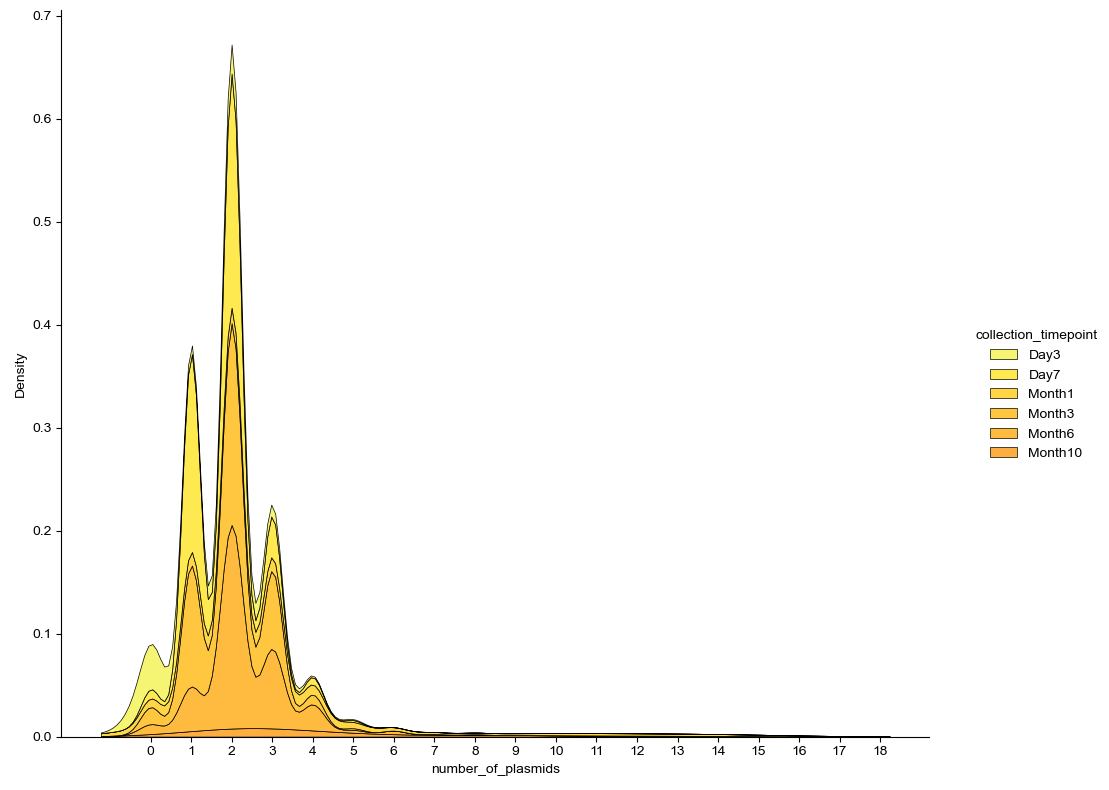

In [54]:
sns.displot(data=AZ51_plasmidcounts, x="number_of_plasmids", hue="collection_timepoint", 
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='Wistia',
            multiple="stack", kind='kde', height=8, aspect=1.2, ec='black', lw=0.5)
plt.xticks(range(0, 19))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('AZ51_stack_density_pcounts.svg', dpi=150, bbox_inches='tight')

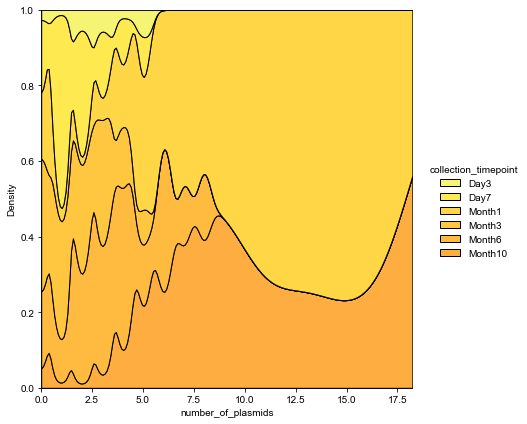

In [42]:
sns.displot(
    data=AZ51_plasmidcounts,
    x="number_of_plasmids", hue="collection_timepoint",
    kind="kde", height=6, warn_singular=False, 
    hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
    multiple="fill", clip=(0, None),
    palette="Wistia")

<AxesSubplot:xlabel='number_of_plasmids', ylabel='Count'>

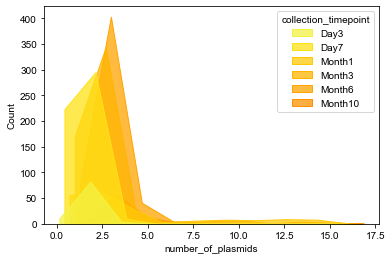

In [43]:
sns.histplot(data=AZ51_plasmidcounts, x="number_of_plasmids", 
             hue="collection_timepoint", bins=10, palette='Wistia',
             common_norm=True, element='poly',
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
            multiple="dodge")

<AxesSubplot:xlabel='number_of_plasmids', ylabel='Count'>

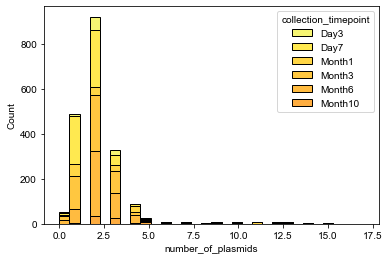

In [44]:
sns.histplot(data=AZ51_plasmidcounts, x="number_of_plasmids", 
             hue="collection_timepoint", bins=30, palette='Wistia',
             common_norm=True, 
             #element='poly',
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
            multiple="stack")

In [45]:
#Need to plot average number of plasmids per isolate per TP
AZ51_plasmidcounts2 = AZ51_plasmidcounts[["collection_timepoint", "number_of_plasmids"]].copy()
AZ51_group_plasmidcounts = AZ51_plasmidcounts2.groupby(by=["collection_timepoint"]).sum()
AZ51_group_plasmidcounts.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

,number_of_plasmids
collection_timepoint,
Day3,211
Day7,889
Month1,795
Month3,991
Month6,1195
Month10,425


In [46]:
AZ51_plasmidcounts3 = AZ51_plasmidcounts[["collection_timepoint", 'isolate_number']].copy()
AZ51_isocounts_plasmidcounts = AZ51_plasmidcounts3.groupby(by=["collection_timepoint"]).count()
AZ51_isocounts_plasmidcounts.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

,isolate_number
collection_timepoint,
Day3,96
Day7,528
Month1,192
Month3,528
Month6,528
Month10,96


In [47]:
AZ51_summary = pd.concat([AZ51_group_plasmidcounts, AZ51_isocounts_plasmidcounts], axis=1)
AZ51_summary['average_plasmids_per_isolate'] =AZ51_summary['number_of_plasmids']/AZ51_summary['isolate_number']
AZ51_summary.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

,number_of_plasmids,isolate_number,average_plasmids_per_isolate
collection_timepoint,,,
Day3,211,96,2.197917
Day7,889,528,1.683712
Month1,795,192,4.140625
Month3,991,528,1.876894
Month6,1195,528,2.263258
Month10,425,96,4.427083


In [48]:
AZ51_summary2 = AZ51_summary.copy()
AZ51_summary2 = AZ51_summary2.reset_index()
AZ51_summary2 = AZ51_summary2[AZ51_summary2.collection_timepoint.isin(['reference','Day7','Month3', 'Month6'])]
AZ51_summary2.set_index('collection_timepoint', inplace=True)
AZ51_summary2.reindex(['reference','Day7','Month3', 'Month6'])

,number_of_plasmids,isolate_number,average_plasmids_per_isolate
collection_timepoint,,,
reference,2,1,2.000000
Day7,889,528,1.683712
Month3,991,528,1.876894
Month6,1195,528,2.263258


In [49]:
#are the samples with extra timepoints just outliers from average?
extra_tp_mice = ['41L', '41R', '44R', '46N']
etp_mice_plasmids = AZ51_plasmidcounts[AZ51_plasmidcounts.mouse.isin(extra_tp_mice)]

etp_mice_plasmidc = etp_mice_plasmids[["collection_timepoint", 'isolate_number']].copy()
etp_mice_plasmid_isocounts = etp_mice_plasmidc.groupby(by=["collection_timepoint"]).count()

etp_mice_plasmidcn = etp_mice_plasmids[["collection_timepoint", 'number_of_plasmids']].copy()
etp_mice_plasmid_pcounts = etp_mice_plasmidcn.groupby(by=["collection_timepoint"]).sum()

AZ51_etp_summary = pd.concat([etp_mice_plasmid_pcounts, etp_mice_plasmid_isocounts], axis=1)
AZ51_etp_summary['average_plasmids_per_isolate'] =AZ51_etp_summary['number_of_plasmids']/AZ51_etp_summary['isolate_number']
AZ51_etp_summary.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

,number_of_plasmids,isolate_number,average_plasmids_per_isolate
collection_timepoint,,,
Day3,211,96,2.197917
Day7,175,96,1.822917
Month1,295,96,3.072917
Month3,159,96,1.656250
Month6,213,96,2.218750
Month10,425,96,4.427083


### Plasmid Pangenome

In [110]:
AZ51_pangenome = pd.read_csv('./AZ51_gene_presence_absence_panaroo.Rtab', sep='\t', low_memory=False)
AZ51_pangenome.head()

,Gene,41B_Day7_10_S73_AZ51_lplasmids,41B_Day7_11_S81_AZ51_lplasmids,41B_Day7_12_S89_AZ51_lplasmids,41B_Day7_13_S2_AZ51_plasmids,41B_Day7_14_S10_AZ51_plasmids,41B_Day7_15_S18_AZ51_plasmids,41B_Day7_16_S26_AZ51_lplasmids,41B_Day7_17_S34_AZ51_plasmids,41B_Day7_18_S42_AZ51_lplasmids,...,46R_Month6_24_S766_AZ51_plasmids,46R_Month6_2_S685_AZ51_plasmids,46R_Month6_3_S693_AZ51_plasmids,46R_Month6_4_S701_AZ51_plasmids,46R_Month6_5_S709_AZ51_plasmids,46R_Month6_6_S717_AZ51_plasmids,46R_Month6_7_S725_AZ51_plasmids,46R_Month6_8_S733_AZ51_plasmids,46R_Month6_9_S741_AZ51_plasmids,reference_AZ51_plasmids
0,group_450,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
1,group_449,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
2,group_448,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
3,xerC_2~~~xerC_4,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
4,group_424,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [111]:
AZ51_pangenome.shape

(1736, 1920)

In [114]:
AZ51_pangenome.rename(columns={'Gene':'#OTU ID'}, inplace=True)

In [115]:
AZ51_pangenomen = AZ51_pangenome.set_index('#OTU ID')

In [116]:
AZ51_pangenomen.columns = AZ51_pangenomen.columns.str.replace("_AZ51_mut", "")
AZ51_pangenomen.head()

,41B_Day7_10_S73_AZ51_lplasmids,41B_Day7_11_S81_AZ51_lplasmids,41B_Day7_12_S89_AZ51_lplasmids,41B_Day7_13_S2_AZ51_plasmids,41B_Day7_14_S10_AZ51_plasmids,41B_Day7_15_S18_AZ51_plasmids,41B_Day7_16_S26_AZ51_lplasmids,41B_Day7_17_S34_AZ51_plasmids,41B_Day7_18_S42_AZ51_lplasmids,41B_Day7_19_S50_AZ51_lplasmids,...,46R_Month6_24_S766_AZ51_plasmids,46R_Month6_2_S685_AZ51_plasmids,46R_Month6_3_S693_AZ51_plasmids,46R_Month6_4_S701_AZ51_plasmids,46R_Month6_5_S709_AZ51_plasmids,46R_Month6_6_S717_AZ51_plasmids,46R_Month6_7_S725_AZ51_plasmids,46R_Month6_8_S733_AZ51_plasmids,46R_Month6_9_S741_AZ51_plasmids,reference_AZ51_plasmids
#OTU ID,,,,,,,,,,,,,,,,,,,,,
group_450,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_449,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_448,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
xerC_2~~~xerC_4,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_424,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [118]:
AZ51_pangenomen.columns = AZ51_pangenomen.columns.str.replace("_AZ51_lplasmids", "")
AZ51_pangenomen.columns = AZ51_pangenomen.columns.str.replace("_AZ51_plasmids", "")
AZ51_pangenomen.head()

,41B_Day7_10_S73,41B_Day7_11_S81,41B_Day7_12_S89,41B_Day7_13_S2,41B_Day7_14_S10,41B_Day7_15_S18,41B_Day7_16_S26,41B_Day7_17_S34,41B_Day7_18_S42,41B_Day7_19_S50,...,46R_Month6_24_S766,46R_Month6_2_S685,46R_Month6_3_S693,46R_Month6_4_S701,46R_Month6_5_S709,46R_Month6_6_S717,46R_Month6_7_S725,46R_Month6_8_S733,46R_Month6_9_S741,reference
#OTU ID,,,,,,,,,,,,,,,,,,,,,
group_450,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_449,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_448,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
xerC_2~~~xerC_4,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_424,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [120]:
AZ51_pangenomen.columns = AZ51_pangenomen.columns.str.replace("_S\d+", "", regex=True)
AZ51_pangenomen.columns = AZ51_pangenomen.columns.str.replace("_S", "")
AZ51_pangenomen.columns = AZ51_pangenomen.columns.str.replace("reference", "AZ51_ref")
AZ51_pangenomen.head()

,41B_Day7_10,41B_Day7_11,41B_Day7_12,41B_Day7_13,41B_Day7_14,41B_Day7_15,41B_Day7_16,41B_Day7_17,41B_Day7_18,41B_Day7_19,...,46R_Month6_24,46R_Month6_2,46R_Month6_3,46R_Month6_4,46R_Month6_5,46R_Month6_6,46R_Month6_7,46R_Month6_8,46R_Month6_9,AZ51_ref
#OTU ID,,,,,,,,,,,,,,,,,,,,,
group_450,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_449,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_448,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
xerC_2~~~xerC_4,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
group_424,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [121]:
AZ51_pangenomen.to_csv('./AZ51_gene_presence_absence_biom.tsv', sep='\t')

In [122]:
!biom convert -i AZ51_gene_presence_absence_biom.tsv -o AZ51_gene_presence_absence_plasmid.biom --table-type="OTU table" --to-hdf5

In [ ]:
qiime tools import \
    --input-path AZ51_gene_presence_absence_plasmid.biom \
    --input-format BIOMV210Format \
    --type 'FeatureTable[PresenceAbsence]' \
    --output-path AZ51_gene_presence_absence_plasmid.qza
#ran in command line in qiime2 environment

In [ ]:
qiime diversity alpha \
    --i-table AZ51_gene_presence_absence_plasmid.qza \
    --p-metric 'observed_features' \
    --o-alpha-diversity AZ51_gene_presence_absence_plasmid_obsfeat.qza

In [ ]:
qiime diversity beta \
    --i-table AZ51_gene_presence_absence_plasmid.qza \
    --p-metric 'jaccard' \
    --o-distance-matrix AZ51_plasmid_jaccard_dm.qza

In [ ]:
qiime diversity pcoa \
    --i-distance-matrix AZ51_plasmid_jaccard_dm.qza \
    --o-pcoa AZ51_plasmid_jaccard_pcoa.qza

In [ ]:
 qiime emperor plot \
    --i-pcoa AZ51_plasmid_jaccard_pcoa.qza \
    --m-metadata-file metadata.txt \
    --o-visualization AZ51_plasmid_jaccard_emp.qzv

# Add Observed Genes

In [123]:
AZ20_numbers = pd.read_csv('AZ20_gene_presence_absence_plasmid_obsfeat.tsv', sep='\t', index_col=0)
AZ20_numbers.head()

,observed_features
23B_Day7_10,24
23B_Day7_11,23
23B_Day7_12,24
23B_Day7_13,14
23B_Day7_14,14


In [124]:
AZ51_numbers = pd.read_csv('AZ51_gene_presence_absence_plasmid_obsfeat.tsv', sep='\t', index_col=0)
AZ51_numbers.head()

,observed_features
41B_Day7_10,71
41B_Day7_11,63
41B_Day7_12,71
41B_Day7_13,63
41B_Day7_14,71


In [125]:
AZ51_numbers.shape

(1919, 1)

In [126]:
AZ20_numbers.shape

(1475, 1)

In [128]:
AZ51_numbers['bacteria'] = 'AZ51'
AZ20_numbers['bacteria'] = 'AZ20'

In [129]:
gene_counts = pd.concat([AZ20_numbers, AZ51_numbers])
gene_counts.shape

(3394, 2)

In [130]:
gene_counts.head()

,observed_features,bacteria
23B_Day7_10,24,AZ20
23B_Day7_11,23,AZ20
23B_Day7_12,24,AZ20
23B_Day7_13,14,AZ20
23B_Day7_14,14,AZ20


In [133]:
metadata.head()

,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,elevation_units,empo_1,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
format_combo,,,,,,,,,,,,,,,,,,,,,
23B_Day7_1,12986.23B.Day7.1,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,78.0,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_10,12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,53.3,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_11,12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,80.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_12,12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,49.1,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_13,12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,48.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN


In [134]:
md_counts = pd.merge(metadata, gene_counts, left_index=True, right_index=True)
md_counts.shape

(3382, 57)

In [135]:
md_counts

,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,elevation_units,empo_1,...,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate,observed_features,bacteria
23B_Day7_1,12986.23B.Day7.1,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,24,AZ20
23B_Day7_10,12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,24,AZ20
23B_Day7_11,12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,23,AZ20
23B_Day7_12,12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,24,AZ20
23B_Day7_13,12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,14,AZ20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46R_Month6_7,12986.46R.Month6.7,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,193.0,meters,Host-associated,...,B1,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,73,AZ51
46R_Month6_8,12986.46R.Month6.8,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,193.0,meters,Host-associated,...,B1,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,102,AZ51
46R_Month6_9,12986.46R.Month6.9,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,193.0,meters,Host-associated,...,B1,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,71,AZ51
AZ20_ref,NaN,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,AZ20,NaN,NaN,NaN,NaN,14,AZ20


In [136]:
cut_labels = ['low', 'AZ20_main', 'middle', 'AZ51_main','high','up_to-1000', 'greater_than_1000']
cut_bins = [0, 10, 20, 60, 80, 100, 1000, 2000]
md_counts['bin_name'] = pd.cut(md_counts['observed_features'], bins=cut_bins, labels=cut_labels)

In [137]:
md_counts.tail()

,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,elevation_units,empo_1,...,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate,observed_features,bacteria,bin_name
46R_Month6_7,12986.46R.Month6.7,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,193.0,meters,Host-associated,...,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,73,AZ51,AZ51_main
46R_Month6_8,12986.46R.Month6.8,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,193.0,meters,Host-associated,...,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,102,AZ51,up_to-1000
46R_Month6_9,12986.46R.Month6.9,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,193.0,meters,Host-associated,...,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,71,AZ51,AZ51_main
AZ20_ref,NaN,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AZ20,NaN,NaN,NaN,NaN,14,AZ20,AZ20_main
AZ51_ref,NaN,NaN,NaN,reference,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,AZ51,NaN,NaN,NaN,NaN,71,AZ51,AZ51_main


In [ ]:
#md_counts.to_csv('plasmid_roary_metadata_bins.txt', sep='\t')

## Graphs

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='collection_timepoint', ylabel='observed_features'>

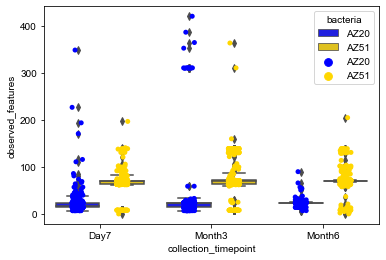

In [142]:
sns.boxplot(data=md_counts, x='collection_timepoint', y='observed_features',
           hue='bacteria', order=['Day7', 'Month3', 'Month6'], palette=['blue','gold'])
sns.stripplot(data=md_counts, x='collection_timepoint', y='observed_features',
           hue='bacteria', order=['Day7', 'Month3', 'Month6'], palette=['blue','gold'],
             dodge=True)

In [152]:
AZ51_plasmidcounts['bacteria'] = 'AZ51'
AZ20_plasmidcounts['bacteria'] = 'AZ20'

In [153]:
plasmidcounts = pd.concat([AZ51_plasmidcounts, AZ20_plasmidcounts])
plasmidcounts.head()

,sample-id,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate,bacteria
0,41B_Day7_10,2,12986.41B.Day7.10,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51
1,41B_Day7_11,1,12986.41B.Day7.11,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51
2,41B_Day7_12,2,12986.41B.Day7.12,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51
3,41B_Day7_13,1,12986.41B.Day7.13,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51
4,41B_Day7_14,2,12986.41B.Day7.14,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51


<AxesSubplot:xlabel='collection_timepoint', ylabel='number_of_plasmids'>

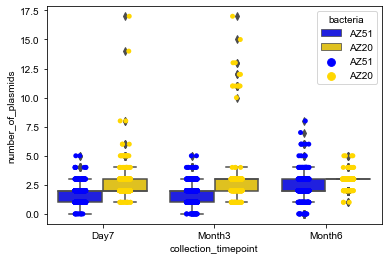

In [154]:
sns.boxplot(data=plasmidcounts, x='collection_timepoint', y='number_of_plasmids',
           hue='bacteria', order=['Day7', 'Month3', 'Month6'], palette=['blue','gold'])
sns.stripplot(data=plasmidcounts, x='collection_timepoint', y='number_of_plasmids',
           hue='bacteria', order=['Day7', 'Month3', 'Month6'], palette=['blue','gold'],
             dodge=True)

In [163]:
AZ20_counts = md_counts[md_counts['bacteria_strain']=='AZ20']
AZ20_counts['observed_features'].describe()

count    1463.000000
mean       23.892003
std        33.842871
min         7.000000
25%        14.000000
50%        23.000000
75%        24.000000
max       421.000000
Name: observed_features, dtype: float64

In [164]:
AZ20_counts['observed_features'].median()

23.0

In [165]:
AZ51_counts = md_counts[md_counts['bacteria_strain']=='AZ51']
AZ51_counts['observed_features'].describe()

count    1919.000000
mean       90.830641
std       118.098742
min         0.000000
25%        63.000000
50%        71.000000
75%        71.000000
max      1408.000000
Name: observed_features, dtype: float64

In [166]:
AZ51_counts['observed_features'].median()

71.0

In [160]:
len(md_counts.index)

3382

In [159]:
len(md_counts.index.unique())

3379

In [161]:
md_counts2 = md_counts.reset_index()

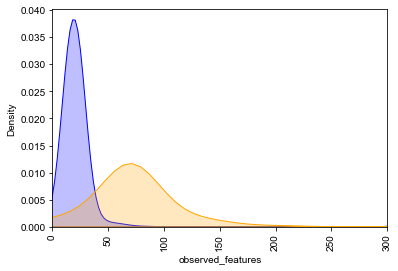

In [162]:
sns.kdeplot(data=md_counts2[md_counts2['bacteria'] == 'AZ20'], 
            x="observed_features", color='blue', shade=True)
sns.kdeplot(data=md_counts2[md_counts2['bacteria'] == 'AZ51'], 
            x="observed_features", color='orange', shade=True)
plt.xticks(np.arange(0, md_counts2.observed_features.max(), 50), rotation=90)
plt.xlim(0, 300)
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./Both_alpha_observed_genes_shade.svg', dpi=300, bbox_inches="tight")

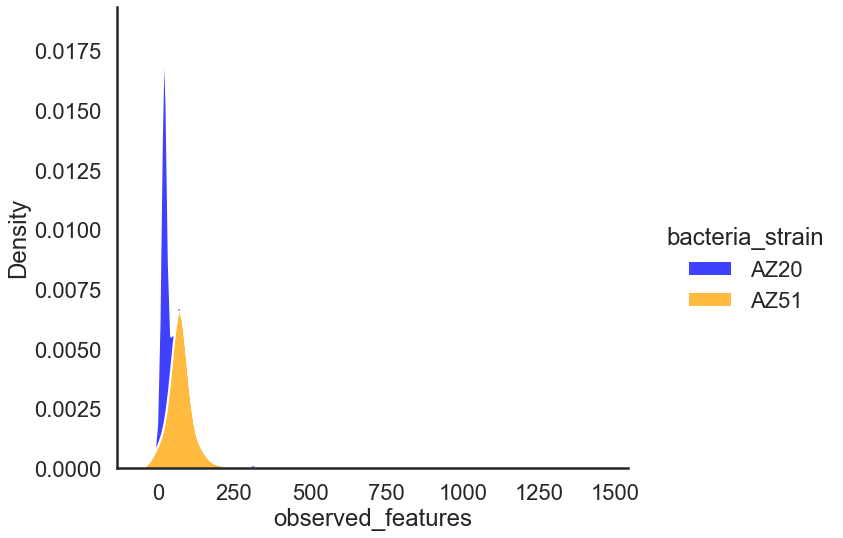

In [168]:
sns.set(rc={'figure.figsize':(20,10)})
sns.set_context('poster')
sns.set_style('white')
g = sns.displot(data=md_counts2, x="observed_features", hue="bacteria_strain", multiple="stack", 
           palette=['blue', 'orange'], kind='kde', height=8, aspect=1.2)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('./Both_alpha_observed_genes_stack.png', dpi=300, bbox_inches="tight")

In [169]:
mdorderd = md_counts.copy()

In [170]:
mdorderd['collection_timepoint'].unique()

array(['Day7', 'Month3', 'Month6', 'Day3', 'Month10', 'Month1',
       'reference'], dtype=object)

In [171]:
mdorderd['TP'] = mdorderd['collection_timepoint'].apply(lambda x: {'Day3':0,'Day7':1, 'Month1':2,
                                                      'Month3':3, 'Month6':4, 'Month10':5, 'reference':np.nan}[x])

In [173]:
mdorderd2 = mdorderd.reset_index()

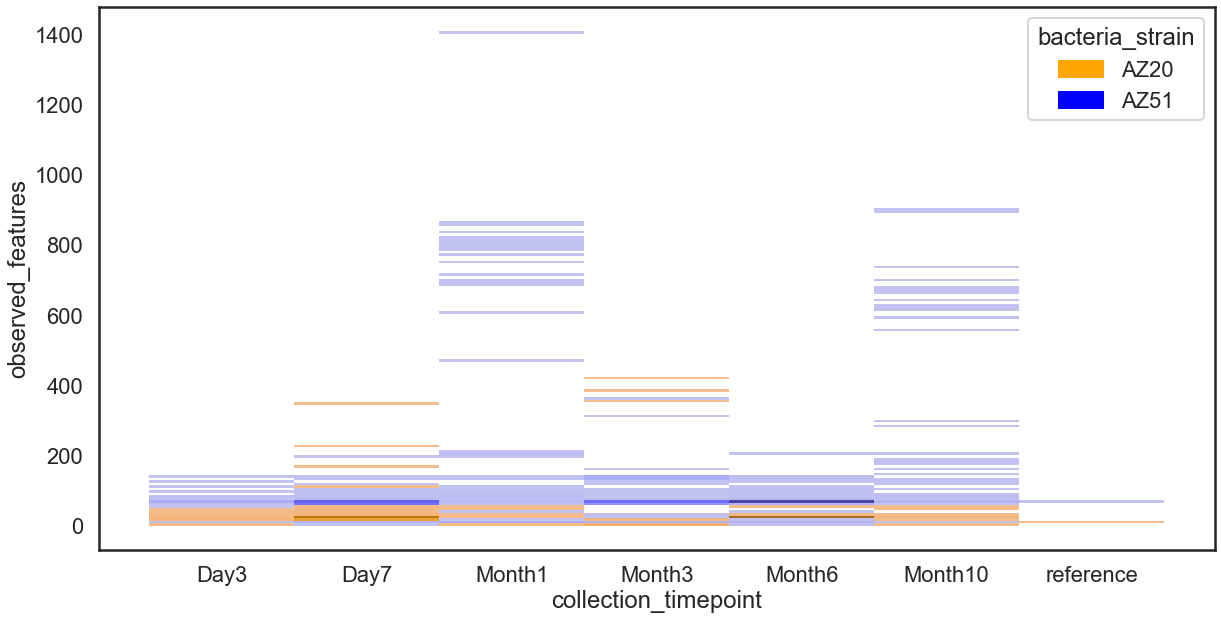

In [175]:
sns.histplot(data=mdorderd2.sort_values("TP"), 
             y="observed_features", x='collection_timepoint', 
             hue="bacteria_strain", 
              palette=['orange', 'blue'])
plt.rcParams['figure.figsize']=(10,10)

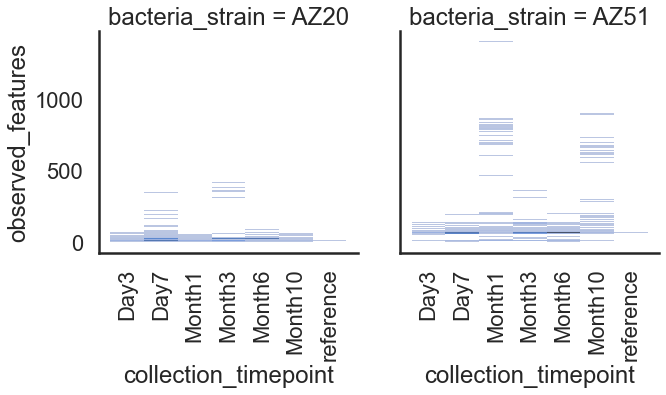

In [182]:
g = sns.displot(data=mdorderd2.sort_values("TP"), 
             y="observed_features", x='collection_timepoint', 
             col="bacteria_strain")
g.set_xticklabels(rotation=90)

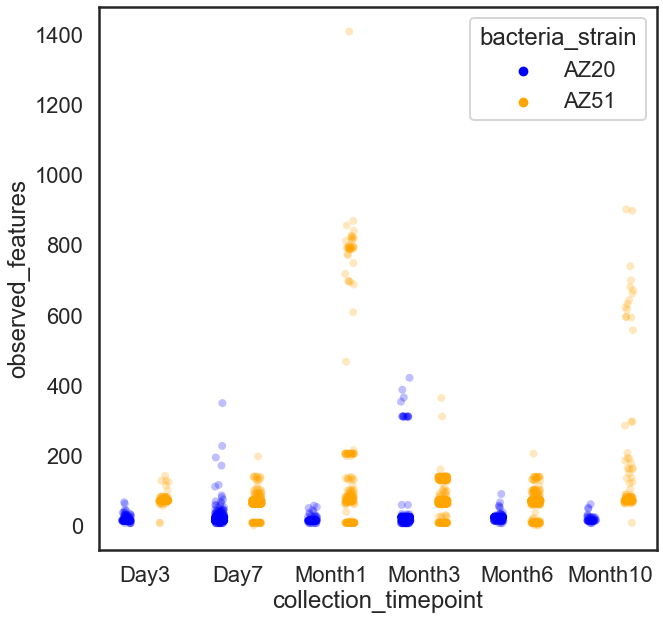

In [183]:
sns.set_context('poster')
sns.stripplot(data=mdorderd[mdorderd['collection_timepoint']!='reference'].sort_values("TP"), 
             y="observed_features", x='collection_timepoint', 
             hue="bacteria_strain", palette=['blue', 'orange'], dodge=True, size=8, alpha=.25)
plt.rcParams['figure.figsize']=(10,15)
#plt.savefig('./Observed_features_over_time.png', dpi=300, bbox_inches="tight")

In [184]:
longTPs = list(mdorderd[mdorderd['collection_timepoint']=='Day3'].mouse.unique())

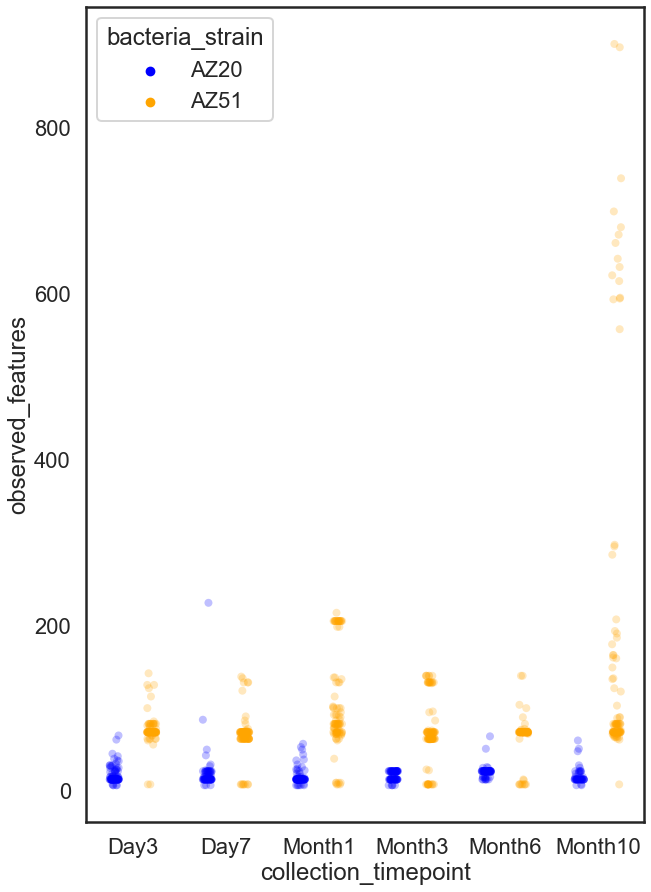

In [185]:
sns.set_context('poster')
sns.stripplot(data=mdorderd[mdorderd['mouse'].isin(longTPs)].sort_values("TP"), 
             y="observed_features", x='collection_timepoint', 
             hue="bacteria_strain", palette=['blue', 'orange'], dodge=True, size=8, alpha=.25)
plt.rcParams['figure.figsize']=(15,10)
#plt.savefig('./Observed_features_over_time_longmice.png', dpi=300, bbox_inches="tight")

In [227]:
plasmid_counts = pd.concat([AZ51_plasmidcounts, AZ20_plasmidcounts])
plasmid_counts.head()

,sample-id,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,...,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate,bacteria
0,41B_Day7_10,2,12986.41B.Day7.10,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51
1,41B_Day7_11,1,12986.41B.Day7.11,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51
2,41B_Day7_12,2,12986.41B.Day7.12,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51
3,41B_Day7_13,1,12986.41B.Day7.13,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51
4,41B_Day7_14,2,12986.41B.Day7.14,NaN,41.0,Day7,9/20/17 10:00,9/13/17,RC,193.0,...,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0,AZ51


In [229]:
both_all = pd.merge(gene_counts, plasmid_counts.set_index('sample-id'), left_index=True, right_index=True)
both_all

,observed_features,bacteria_x,number_of_plasmids,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,...,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate,bacteria_y
23B_Day7_1,24,AZ20,3,12986.23B.Day7.1,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,...,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,AZ20
23B_Day7_10,24,AZ20,3,12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,...,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,AZ20
23B_Day7_11,23,AZ20,3,12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,...,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,AZ20
23B_Day7_12,24,AZ20,3,12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,...,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,AZ20
23B_Day7_13,14,AZ20,2,12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,...,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN,AZ20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46R_Month6_7,73,AZ51,3,12986.46R.Month6.7,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,...,46R,B1,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,AZ51
46R_Month6_8,102,AZ51,3,12986.46R.Month6.8,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,...,46R,B1,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,AZ51
46R_Month6_9,71,AZ51,2,12986.46R.Month6.9,NaN,46.0,Month6,3/13/18 10:00,9/13/17,RC,...,46R,B1,B,3/13/18,AZ51,magnetic bead,Thermo CORE,2.0,21.0,AZ51
AZ20_ref,14,AZ20,2,NaN,NaN,NaN,reference,NaN,NaN,NaN,...,ref,NaN,NaN,NaN,AZ20,NaN,NaN,NaN,NaN,AZ20


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


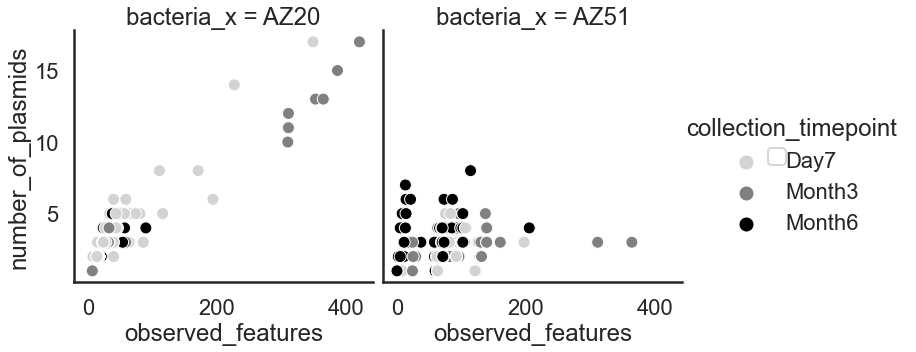

In [240]:
sns.relplot(data=both_all[both_all['collection_timepoint'].isin(['Day7', 'Month3', 'Month6'])], 
                x='observed_features', y='number_of_plasmids', kind='scatter',
           col='bacteria_x', hue='collection_timepoint', palette=['lightgrey','grey', 'black'])
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Manual PCoA

In [188]:
metadata.head()

,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,diet,elevation,elevation_units,empo_1,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
format_combo,,,,,,,,,,,,,,,,,,,,,
23B_Day7_1,12986.23B.Day7.1,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,78.0,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_10,12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,53.3,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_11,12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,80.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_12,12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,49.1,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_13,12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,RC,193.0,meters,Host-associated,...,48.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN


In [189]:
AZ20_pcoa = pd.read_csv('AZ20_plasmid_jaccard_pcoa.txt', sep='\t', index_col=0)
AZ51_pcoa = pd.read_csv('AZ51_plasmid_jaccard_pcoa.txt', sep='\t', index_col=0)

In [191]:
AZ20_pcoa_named = pd.merge(AZ20_pcoa, metadata, left_index=True, right_index=True)
AZ20_pcoa_named.head()

,Axis1_51.74,Axis2_12.63,Axis3_11.37,Axis4_4.33,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
23B_Day7_1,-0.161161,0.059229,0.028975,-0.008703,12986.23B.Day7.1,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,...,78.0,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_10,-0.161161,0.059229,0.028975,-0.008703,12986.23B.Day7.10,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,...,53.3,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_11,-0.135140,0.064440,0.020088,-0.009280,12986.23B.Day7.11,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,...,80.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_12,-0.161161,0.059229,0.028975,-0.008703,12986.23B.Day7.12,10.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,...,49.1,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN
23B_Day7_13,0.254822,0.017439,-0.045158,0.002334,12986.23B.Day7.13,14.0,23.0,Day7,7/19/17 10:00,7/12/17 0:00,...,48.6,23B,A1,A,7/19/17,AZ20,filter,Qiagen UltraClean,1.0,NaN


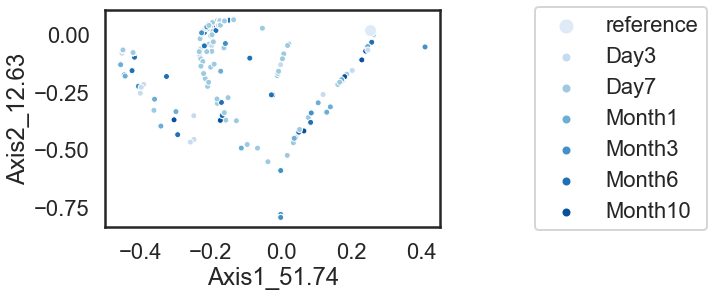

In [216]:
sns.scatterplot(data=AZ20_pcoa_named, x='Axis1_51.74', y='Axis2_12.63',
               hue='collection_timepoint', style='collection_timepoint',
                palette='Blues', markers=['o', '.', '.', '.', '.', '.', '.'])
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#jaccard - presence/abscence

In [205]:
AZ20_pcoa_named['collection_timepoint'] = pd.Categorical(AZ20_pcoa_named['collection_timepoint'],
                                                        ['reference','Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
convert_time={'reference':0,'Day3':1, 'Day7':2, 'Month1':3, 'Month3':4, 'Month6':5, 'Month10':6}
AZ20_pcoa_named['ctime'] = AZ20_pcoa_named['collection_timepoint'].map(convert_time)

In [192]:
AZ51_pcoa_named = pd.merge(AZ51_pcoa, metadata, left_index=True, right_index=True)
AZ51_pcoa_named.head()

,Axis1_51.03,Axis2_17.08,Axis3_9.84,Axis4_3.65,sample_name,box_id,cage_id,collection_timepoint,collection_timestamp,date_colonized,...,zarrinparlab_quant_ng_ul,mouse,dam,sire,date_collected,bacteria_strain,extraction_method,extraction_kit,run,plate
41B_Day7_1,-0.087139,-0.059036,-0.018923,-0.009151,12986.41B.Day7.1,NaN,41.0,Day7,9/20/17 10:00,9/13/17,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0
41B_Day7_10,-0.087139,-0.059036,-0.018923,-0.009151,12986.41B.Day7.10,NaN,41.0,Day7,9/20/17 10:00,9/13/17,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0
41B_Day7_11,-0.191632,-0.015059,0.036286,0.013690,12986.41B.Day7.11,NaN,41.0,Day7,9/20/17 10:00,9/13/17,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0
41B_Day7_12,-0.087139,-0.059036,-0.018923,-0.009151,12986.41B.Day7.12,NaN,41.0,Day7,9/20/17 10:00,9/13/17,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0
41B_Day7_13,-0.191632,-0.015059,0.036286,0.013690,12986.41B.Day7.13,NaN,41.0,Day7,9/20/17 10:00,9/13/17,...,NaN,41B,A1,A,9/20/17,AZ51,magnetic bead,Thermo CORE,2.0,5.0


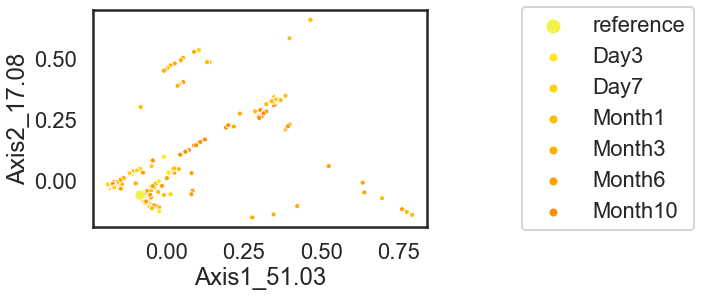

In [221]:
sns.scatterplot(data=AZ51_pcoa_named, x='Axis1_51.03', y='Axis2_17.08',
               hue='collection_timepoint', style='collection_timepoint',
                palette='Wistia', markers=['o', '.', '.', '.', '.', '.', '.'],
               s=100)
plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)
#jaccard - presence/abscence

In [218]:
AZ51_pcoa_named['collection_timepoint'] = pd.Categorical(AZ51_pcoa_named['collection_timepoint'],
                                                        ['reference','Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
convert_time={'reference':0,'Day3':1, 'Day7':2, 'Month1':3, 'Month3':4, 'Month6':5, 'Month10':6}
AZ51_pcoa_named['ctime'] = AZ51_pcoa_named['collection_timepoint'].map(convert_time)

In [ ]:
sns.boxplot(data=AZ51_pcoa_named, x='observed_features', y='number_of_plasmids',
           hue='collection_timepoint', order=['Day7', 'Month3', 'Month6'], palette=['blue','gold'])
sns.stripplot(data=AZ51_pcoa_named, x='observed_features', y='number_of_plasmids',
           hue='collection_timepoint', order=['Day7', 'Month3', 'Month6'], palette=['blue','gold'],
             dodge=True)

# Try 3D

In [208]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

z = AZ20_pcoa_named['Axis1_51.74']
y = AZ20_pcoa_named['Axis2_12.63']
x = AZ20_pcoa_named['ctime']

ax.set_zlabel("PCoA Axis1 51.7%")
ax.set_ylabel("PCoA Axis2 12.6%")
ax.set_xlabel("time")

ax.scatter(x, y, z)

plt.show()

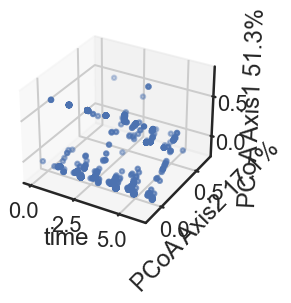

In [222]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

z = AZ51_pcoa_named['Axis1_51.03']
y = AZ51_pcoa_named['Axis2_17.08']
x = AZ51_pcoa_named['ctime']

ax.set_zlabel("PCoA Axis1 51.3%")
ax.set_ylabel("PCoA Axis2 17.1%")
ax.set_xlabel("time")

ax.scatter(x, y, z)

plt.show()